# Credit Card Segmentation
## Problem Statement -
This case requires trainees to develop a customer segmentation to define
marketing strategy. The sample dataset summarizes the usage behaviour of about 9000
active credit card holders during the last 6 months. The file is at a customer level with
18 behavioural variables.

## Dataset Description
* **CUST_ID :** Credit card holder ID
* **BALANCE:** Monthly average balance (based on daily balance averages)
* **BALANCE_FREQUENCY:** Ratio of last 12 months with balance
* **PURCHASES:** Total Total purchase made by the credit card during last 12 months
* **ONEOFF_PURCHASES:** Total amount of one-off purchases
* **INSTALLMENTS_PURCHASES:** Total amount of installment purchases
* **CASH_ADVANCE:** Total cash-advance amount
* **PURCHASES_ FREQUENCY:** Frequency of purchases (percentage of months
with at least on purchase)
* **ONEOFF_PURCHASES_FREQUENCY:** Frequency of one-off-purchases
* **PURCHASES_INSTALLMENTS_FREQUENCY:** Frequency of installment
purchases
* **CASH_ADVANCE_ FREQUENCY:** Cash-Advance frequency
* **AVERAGE_PURCHASE_TRX:** Average amount per purchase transaction
* **CASH_ADVANCE_TRX:** Average amount per cash-advance transaction
* **PURCHASES_TRX:** Average amount per purchase transaction
* **CREDIT_LIMIT:** Credit limit
* **PAYMENTS:** Total payments (due amount paid by the customer to decrease their
statement balance) in the period
* **MINIMUM_PAYMENTS:** Total minimum payments due in the period.
* **PRC_FULL_PAYMENT:** Percentage of months with full payment of the due
statement balance
* **TENURE:** Number of months as a customer


In [1020]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans


In [1021]:
card_data=pd.read_csv("E:/dataset/credit-card-data.csv")

In [1022]:
card_data.shape

(8950, 18)

In [1023]:
card_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [1024]:
card_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [1025]:
card_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C15843,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,8950,NaN,NaN,NaN,1564.47,2081.53,0,128.282,873.385,2054.14,19043.1
BALANCE_FREQUENCY,8950,NaN,NaN,NaN,0.877271,0.236904,0,0.888889,1,1,1
PURCHASES,8950,NaN,NaN,NaN,1003.2,2136.63,0,39.635,361.28,1110.13,49039.6
ONEOFF_PURCHASES,8950,NaN,NaN,NaN,592.437,1659.89,0,0,38,577.405,40761.2
INSTALLMENTS_PURCHASES,8950,NaN,NaN,NaN,411.068,904.338,0,0,89,468.637,22500
CASH_ADVANCE,8950,NaN,NaN,NaN,978.871,2097.16,0,0,0,1113.82,47137.2
PURCHASES_FREQUENCY,8950,NaN,NaN,NaN,0.490351,0.401371,0,0.083333,0.5,0.916667,1
ONEOFF_PURCHASES_FREQUENCY,8950,NaN,NaN,NaN,0.202458,0.298336,0,0,0.083333,0.3,1
PURCHASES_INSTALLMENTS_FREQUENCY,8950,NaN,NaN,NaN,0.364437,0.397448,0,0,0.166667,0.75,1


From the above table we can analyse that
* Customer Id is a unique filed and is not required for any anlysis because we can't get any information from unique field so we can drop Customer ID field.
* Balance started from 0 goes to 19043 and the average balance of customer is 1564.
* Purchase made by all the credit card samples are in range of 0 to 49039. 
* Credit limit for customer lies between 50 to 30000.
* customer connected with company from last 6 month to 12 month. so, atleast 6 months customer spent as a credit card user.

In [1026]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Univariate Analysis

### Distrubtion of all features

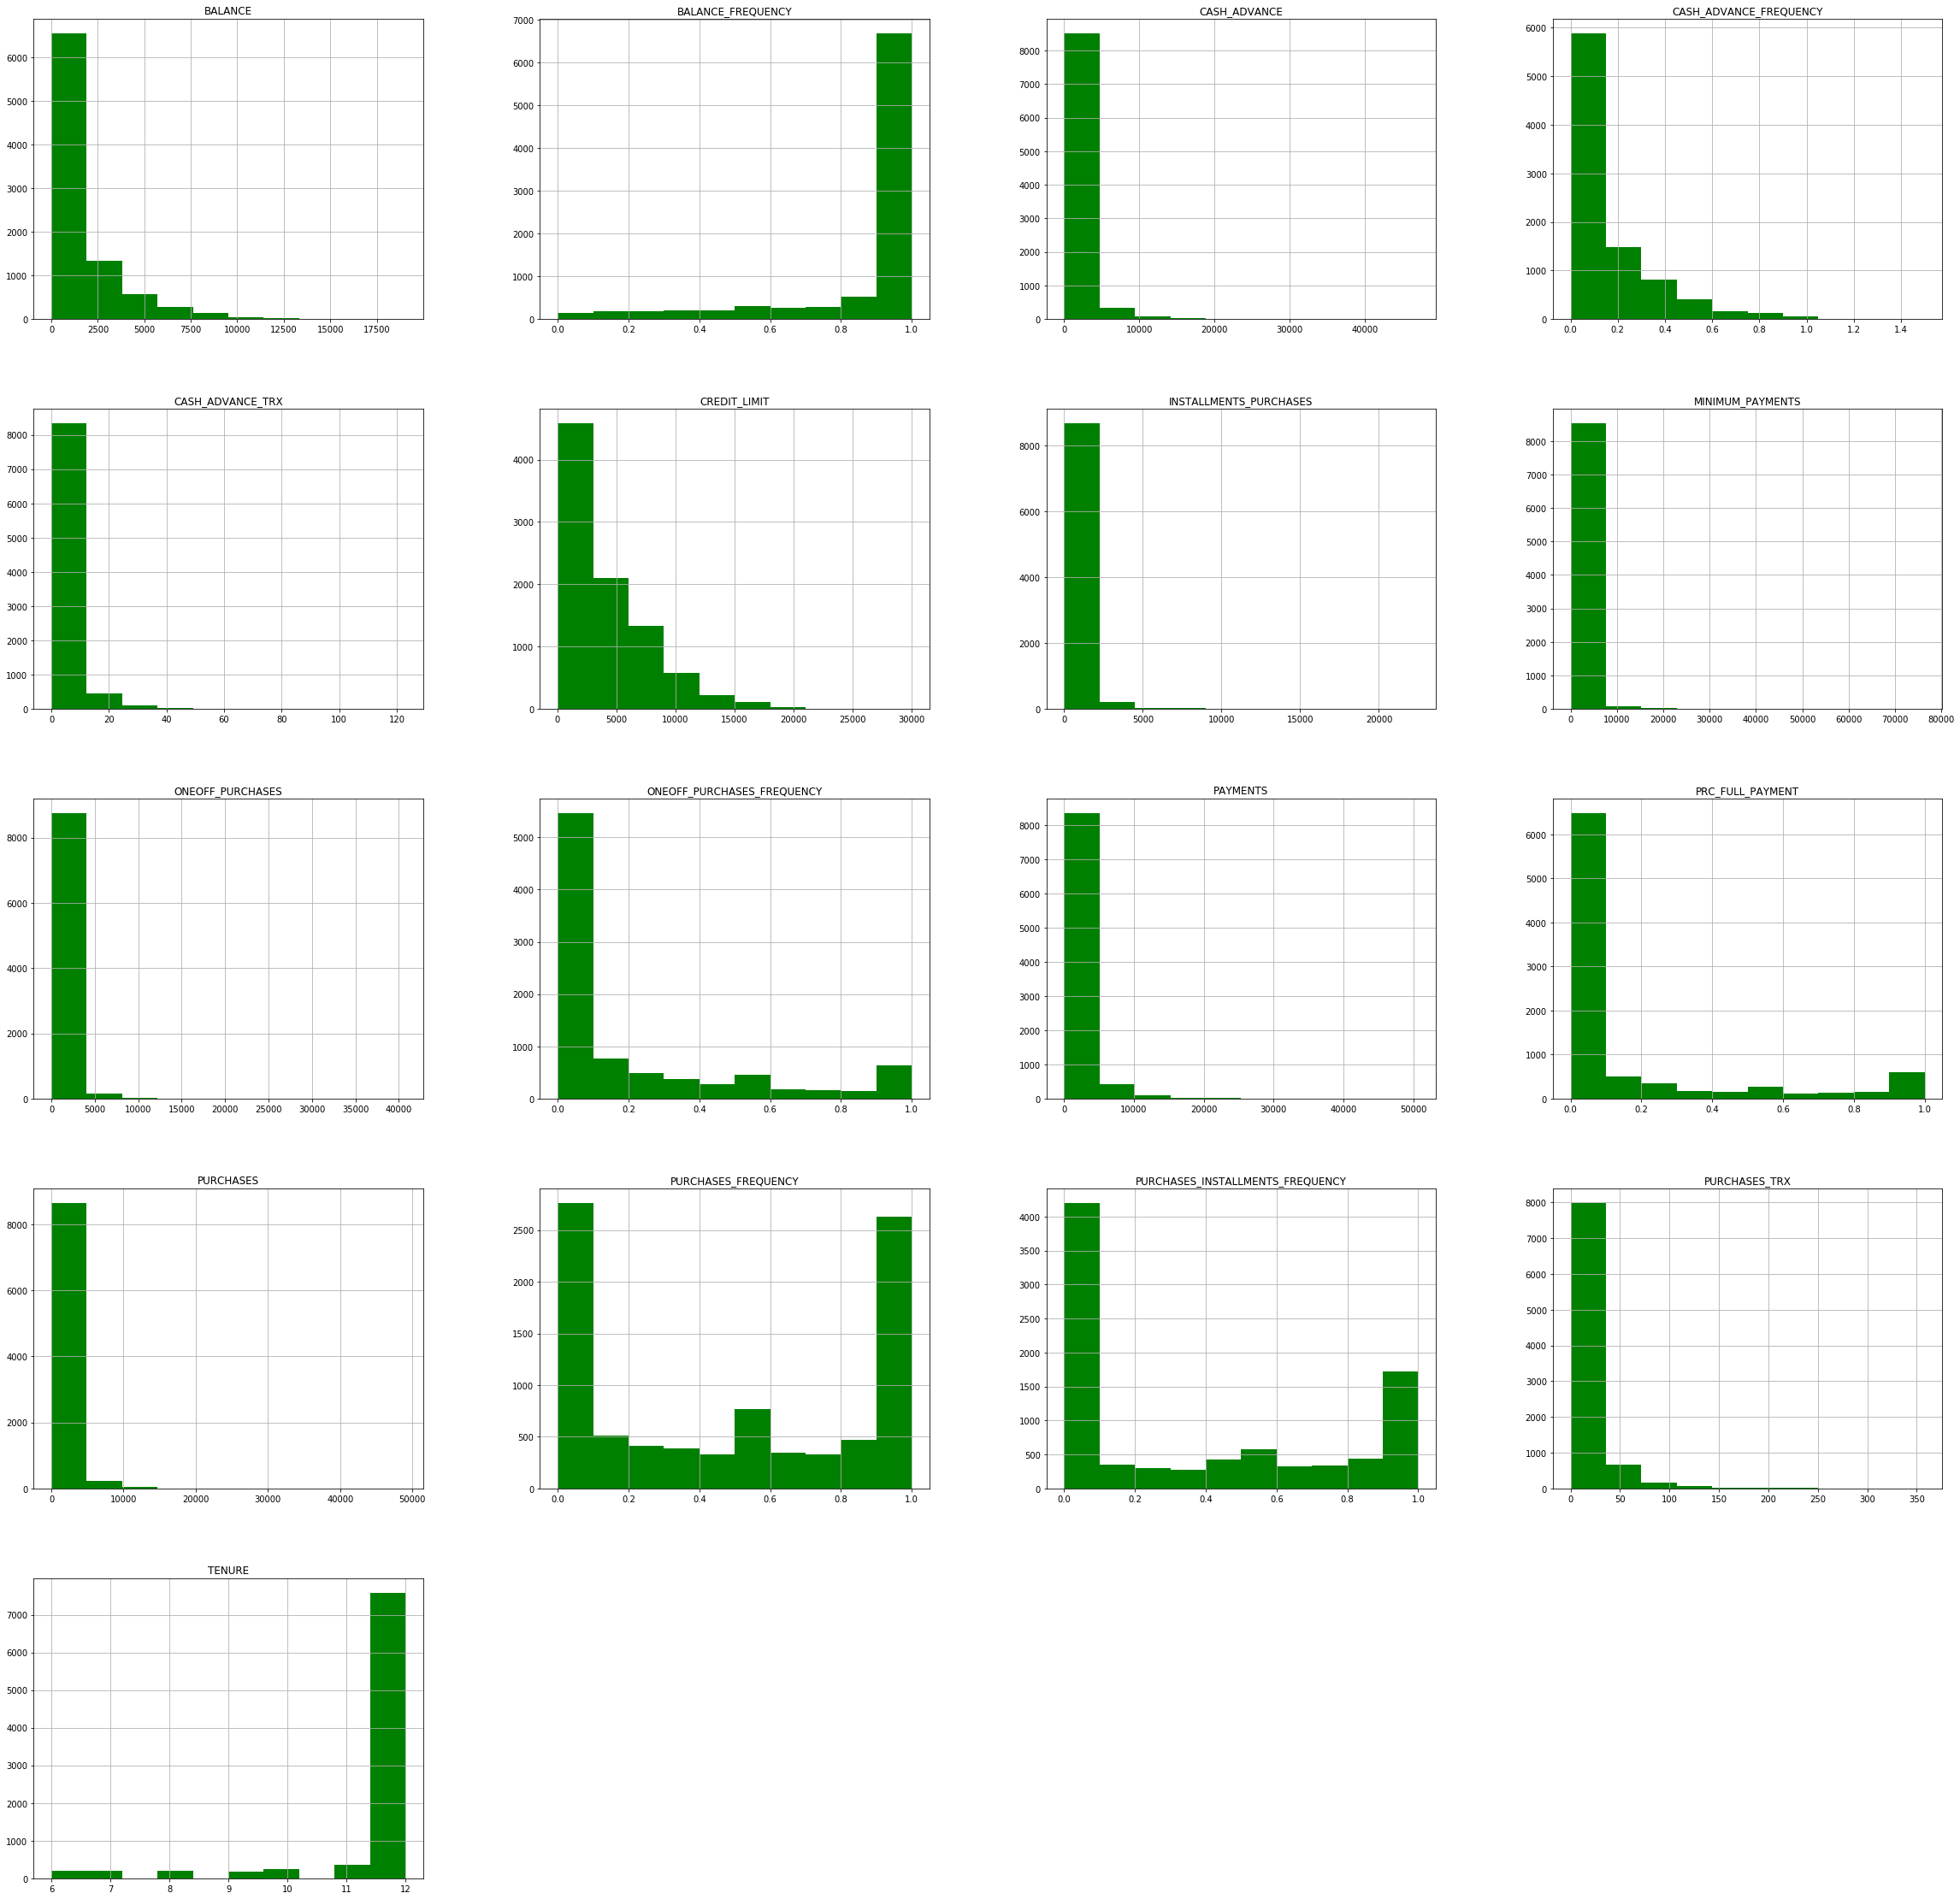

In [1027]:
card_data.hist(figsize=[40,40],color="green");

From the above diagram we can see data maximum feature are either right skewed or left skewed.

### Missing Value Analysis

In [1028]:
Total_null_val=card_data.isnull().sum().sort_values(ascending=False)
per_null_val=(card_data.isnull().sum().sort_values(ascending=False)/len(card_data))*100

pd.concat([Total_null_val,per_null_val],axis=1,keys=["Total_null_val","Per_null_val"])


,Total_null_val,Per_null_val
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173
TENURE,0,0.000000
PURCHASES_FREQUENCY,0,0.000000
BALANCE,0,0.000000
BALANCE_FREQUENCY,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000


So we can see that only **Minimum_payment and Credit_limit** have missing values and that are 3.49% and 0.01% so that are very nominal so we will impute these missing values.

For imputing missing values we can use mean, median or knn imputation methods. but here in our dataset all feature specially Minimum_payment and Credit_limit both are left skewed so we use median method for imputaion.

### Imputing Missing Values


In [1029]:
card_data['MINIMUM_PAYMENTS'].median()

312.343947

In [1030]:
card_data['CREDIT_LIMIT'].median()

3000.0

In [1031]:
card_data['MINIMUM_PAYMENTS']=card_data['MINIMUM_PAYMENTS'].fillna(card_data['MINIMUM_PAYMENTS'].median())
card_data['CREDIT_LIMIT']=card_data['CREDIT_LIMIT'].fillna(card_data['CREDIT_LIMIT'].median())

In [1032]:
card_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [1033]:
card_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Deriving new KPIs

1. monthly average purchase
2. monthly cash advance amount,
* purchases by type (one-off, instalments)
* average amount per purchase and
* cash advance transaction,
* limit usage (balance to credit limit ratio), 
* payments to minimum payments ratio etc.

In [1034]:
card_data["avg_purchase"]=card_data["PURCHASES"]/card_data["TENURE"]

In [1035]:
card_data["avg_cashAdvance"]=card_data["CASH_ADVANCE"]/card_data["TENURE"]

In [1036]:
card_data.query('(INSTALLMENTS_PURCHASES==0)&(ONEOFF_PURCHASES>0)').shape

(1874, 20)

In [1037]:
card_data.query('(INSTALLMENTS_PURCHASES>0)&(ONEOFF_PURCHASES>0)').shape

(2774, 20)

In [1038]:
card_data.query('(INSTALLMENTS_PURCHASES>0)&(ONEOFF_PURCHASES==0)').shape

(2260, 20)

In [1039]:
card_data.query('(INSTALLMENTS_PURCHASES<=0)&(ONEOFF_PURCHASES<=0)').shape

(2042, 20)

In [1043]:
card_data.query('(INSTALLMENTS_PURCHASES<=0)&(ONEOFF_PURCHASES<=0)')[['PURCHASES','PURCHASES_TRX']]

,PURCHASES,PURCHASES_TRX
1,0.0,0
14,0.0,0
16,0.0,0
24,0.0,0
35,0.0,0
...,...,...
8920,0.0,0
8929,0.0,0
8937,0.0,0
8938,0.0,0


There are 4 type of purchase made by the customer:
1. Customer who had not purchase any thing yet i.e neither in installment nor in one-off purchase had done.
2. Customer who had purchase in installment.
3. Customer who had done purchase in one time as one off purchase.
4. Customer who had done purchase by both of method in installment as well as in one off.

So, we derived a new feature named purchase type as

In [1044]:
def purchase_type(card_data):
    if((card_data['INSTALLMENTS_PURCHASES']==0)&(card_data["ONEOFF_PURCHASES"]==0)):
        return "none"
    elif((card_data['INSTALLMENTS_PURCHASES']>0)&(card_data["ONEOFF_PURCHASES"]==0)):
        return "Installment"
    elif((card_data['INSTALLMENTS_PURCHASES']==0)&(card_data["ONEOFF_PURCHASES"]>0)):
        return "one-off"
    elif((card_data['INSTALLMENTS_PURCHASES']>0)&(card_data["ONEOFF_PURCHASES"]>0)):
        return "both"
    

In [1045]:
card_data['Purchase_type']= card_data.apply(purchase_type , axis=1)

In [1046]:
card_data.query('Purchase_type=="none"')[['PURCHASES','PURCHASES_TRX']]

,PURCHASES,PURCHASES_TRX
1,0.0,0
14,0.0,0
16,0.0,0
24,0.0,0
35,0.0,0
...,...,...
8920,0.0,0
8929,0.0,0
8937,0.0,0
8938,0.0,0


**PURCHASES_TRX field have some noise which will cause problem to our model and also for deriving new KPI. We can see by following analysis**

In [1047]:
card_data.query('PURCHASES_TRX==0 & PURCHASES>0')[['CUST_ID','PURCHASES',"PURCHASES_TRX",'Purchase_type',
       'CREDIT_LIMIT', 'PAYMENTS']]

,CUST_ID,PURCHASES,PURCHASES_TRX,Purchase_type,CREDIT_LIMIT,PAYMENTS
1458,C11506,130.24,0,Installment,14000.0,28988.973880
3590,C13691,0.24,0,one-off,3000.0,150.381107
4497,C14622,655.68,0,Installment,1000.0,718.537117


* From the above table we can see that customer Id having C11506, C13691 and C14622 have noise in the dataset either we can remove these samples from the dataset or we will impute them.
* In these sample they have some purchase amount and also mode of purchase but in purchase transaction field it shows no transaction has been done.
* So to remove that noise we update the PURCHASES_TRX value by the mode value of Purchase_type.

In [1048]:
one_off_mode=card_data.query('Purchase_type=="one-off"')["PURCHASES_TRX"].mode()
Installment_mode=card_data.query('Purchase_type=="Installment"')["PURCHASES_TRX"].mode()

In [1049]:
card_data.at[1458,'PURCHASES_TRX']=Installment_mode
card_data.at[3590,'PURCHASES_TRX']=one_off_mode
card_data.at[4497,'PURCHASES_TRX']=Installment_mode

In [1050]:
card_data.at[1458,'PURCHASES_TRX']

12

In [1051]:
#card_data["PURCHASES_TRX"]=np.where((card_data["PURCHASES_TRX"]==0 )& (card_data["PURCHASES"]>0) & (card_data["Purchase_type"]=='one-off'),one_off_mode,Installment_mode)

In [1052]:
card_data['per_purchase_amt']=card_data['PURCHASES']/card_data['PURCHASES_TRX']
card_data['per_txn_CashAdvAmt']=card_data['CASH_ADVANCE']/card_data['CASH_ADVANCE_TRX']

In [1053]:
card_data['per_purchase_amt'].fillna(0,inplace=True)
card_data['per_txn_CashAdvAmt'].fillna(0,inplace=True)

In [1054]:
card_data['limit_usage']=card_data['BALANCE']/card_data['CREDIT_LIMIT']
card_data['payment_minpay']=card_data['PAYMENTS']/card_data['MINIMUM_PAYMENTS']

In [1055]:
card_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'avg_purchase',
       'avg_cashAdvance', 'Purchase_type', 'per_purchase_amt',
       'per_txn_CashAdvAmt', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [1056]:
# deleting customer id from the dataset
del card_data['CUST_ID']

In [1057]:
card_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
avg_purchase                        0
avg_cashAdvance                     0
Purchase_type                       0
per_purchase_amt                    0
per_txn_CashAdvAmt                  0
limit_usage                         0
payment_minpay                      0
dtype: int64

In [1058]:
card_data.iloc[0]

BALANCE                                 40.9007
BALANCE_FREQUENCY                      0.818182
PURCHASES                                  95.4
ONEOFF_PURCHASES                              0
INSTALLMENTS_PURCHASES                     95.4
CASH_ADVANCE                                  0
PURCHASES_FREQUENCY                    0.166667
ONEOFF_PURCHASES_FREQUENCY                    0
PURCHASES_INSTALLMENTS_FREQUENCY       0.083333
CASH_ADVANCE_FREQUENCY                        0
CASH_ADVANCE_TRX                              0
PURCHASES_TRX                                 2
CREDIT_LIMIT                               1000
PAYMENTS                                201.802
MINIMUM_PAYMENTS                         139.51
PRC_FULL_PAYMENT                              0
TENURE                                       12
avg_purchase                               7.95
avg_cashAdvance                               0
Purchase_type                       Installment
per_purchase_amt                        

### Advance Reporting

From the derived KPI we can coclude many information as follows:

In [1059]:
card_data.groupby(['Purchase_type'])[['avg_purchase','avg_cashAdvance']].mean()

,avg_purchase,avg_cashAdvance
Purchase_type,,
Installment,46.974347,38.398206
both,192.685172,67.821985
none,0.000000,182.858169
one-off,69.688958,78.995966


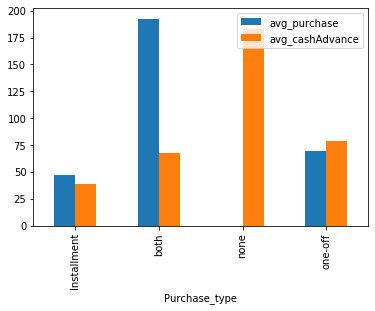

In [1060]:
card_data.groupby(['Purchase_type'])[['avg_purchase','avg_cashAdvance']].mean().plot(kind='bar')

Here we can derived that 
* The customer who have both(Istallment, One-off) purchase type they have highest average purchase.
* The customer who have not puchase anything yet have highest cash advance amount.

In [1061]:
card_data.groupby('Purchase_type')[['payment_minpay']].mean()

,payment_minpay
Purchase_type,
Installment,13.259004
both,7.236982
none,10.087451
one-off,5.571082


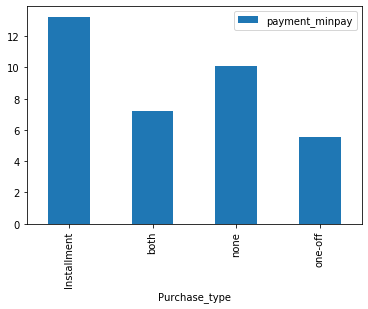

In [1062]:
card_data.groupby('Purchase_type')[['payment_minpay']].mean().plot(kind='bar')

From the above graph we can see that
* Maximum number of Customer having purchase in installments is to pay due ammount. 
* And Customer having one off payment have very less due amount is to pay.

In [1063]:
card_data.groupby('Purchase_type')[['limit_usage']].mean()

,limit_usage
Purchase_type,
Installment,0.271678
both,0.353548
none,0.573771
one-off,0.381074


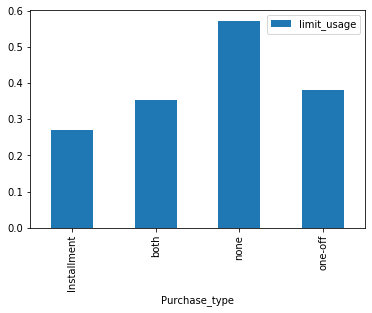

In [1064]:
card_data.groupby('Purchase_type')[['limit_usage']].mean().plot(kind='bar')

**From the above graph we can conclude that the customer who is not purchasing any thing by any of the method has maximum limit usage available in their account.**

In [1065]:
card_data.shape

(8950, 24)

In [1066]:
card_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,avg_purchase,avg_cashAdvance,Purchase_type,per_purchase_amt,per_txn_CashAdvAmt,limit_usage,payment_minpay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,7.950000,0.000000,Installment,47.700000,0.000000,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,0.000000,536.912124,none,0.000000,1610.736371,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,one-off,64.430833,0.000000,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,312.343947,0.000000,12,124.916667,17.149001,one-off,1499.000000,205.788017,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,one-off,16.000000,0.000000,0.681429,2.771075


In [1067]:
card_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_purchase', 'avg_cashAdvance', 'Purchase_type',
       'per_purchase_amt', 'per_txn_CashAdvAmt', 'limit_usage',
       'payment_minpay'],
      dtype='object')

In [1068]:
card_data.query('Purchase_type=="none"')[['PURCHASES','PURCHASES_TRX']]

,PURCHASES,PURCHASES_TRX
1,0.0,0
14,0.0,0
16,0.0,0
24,0.0,0
35,0.0,0
...,...,...
8920,0.0,0
8929,0.0,0
8937,0.0,0
8938,0.0,0


In [1069]:
card_data=pd.get_dummies(card_data, columns=['Purchase_type'])

In [1070]:
card_data.shape

(8950, 27)

In [1071]:
card_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_purchase', 'avg_cashAdvance', 'per_purchase_amt',
       'per_txn_CashAdvAmt', 'limit_usage', 'payment_minpay',
       'Purchase_type_Installment', 'Purchase_type_both', 'Purchase_type_none',
       'Purchase_type_one-off'],
      dtype='object')

In [1072]:
card_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,avg_purchase,avg_cashAdvance,per_purchase_amt,per_txn_CashAdvAmt,limit_usage,payment_minpay,Purchase_type_Installment,Purchase_type_both,Purchase_type_none,Purchase_type_one-off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.000000,47.700000,0.000000,0.040901,1.446508,1,0,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.000000,536.912124,0.000000,1610.736371,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.000000,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,124.916667,17.149001,1499.000000,205.788017,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.000000,16.000000,0.000000,0.681429,2.771075,0,0,0,1


In [1073]:
#card_data.corr().query('PURCHASES_FREQUENCY> 0.75 | PURCHASES_FREQUENCY < -0.75 ')

In [1074]:
card_data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,avg_purchase,avg_cashAdvance,per_purchase_amt,per_txn_CashAdvAmt,limit_usage,payment_minpay,Purchase_type_Installment,Purchase_type_both,Purchase_type_none,Purchase_type_one-off
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,...,0.179711,0.475431,-0.000932,0.243340,0.503557,-0.039446,-0.200831,0.077758,0.152361,-0.031082
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,...,0.131281,0.086020,-0.081291,-0.009280,0.404661,-0.089272,-0.134502,0.193949,0.011738,-0.088938
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,...,0.995845,-0.055473,0.266290,-0.068415,-0.057409,0.016731,-0.126853,0.396686,-0.255291,-0.052136
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,...,0.913060,-0.034545,0.275350,-0.050002,-0.042212,0.010301,-0.207457,0.317956,-0.194062,0.060271
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,...,0.677024,-0.067782,0.123712,-0.069969,-0.058264,0.020621,0.081506,0.353505,-0.247149,-0.233936
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,...,-0.047502,0.976364,-0.050299,0.485603,0.215199,-0.003378,-0.154909,-0.068598,0.261753,-0.026587
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,...,0.395337,-0.215786,-0.014801,-0.214386,-0.201782,0.011407,0.295918,0.515593,-0.664037,-0.217147
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,...,0.499711,-0.089034,0.078533,-0.104363,-0.092007,-0.004550,-0.394452,0.525795,-0.368981,0.204113
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,...,0.314136,-0.179333,-0.076388,-0.173224,-0.161420,0.017921,0.430024,0.463390,-0.498338,-0.471909
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,...,-0.116109,0.628312,-0.109244,0.176123,0.360131,-0.021863,-0.237116,-0.094894,0.373717,-0.024397


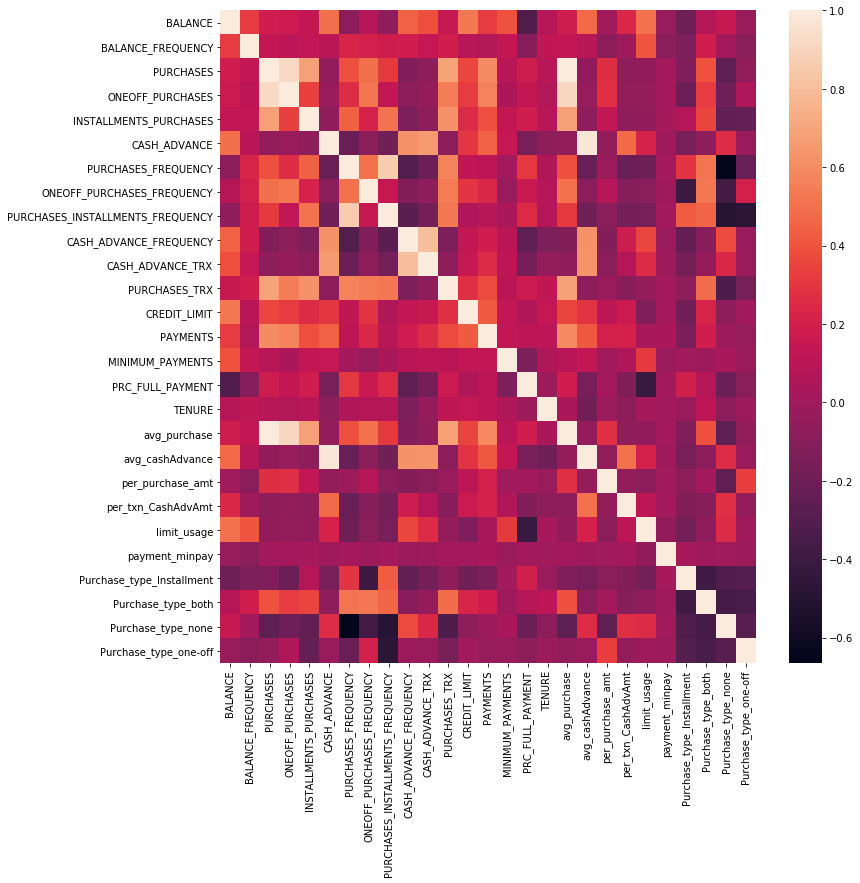

In [1075]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(card_data.corr())

By analysing correlation table and HeatMap of customer card segmentation dataset those feature which is corelated to other feature will remove that feature. So, In our analysis feature have remove feature which has more then 75% correlation with other feature.


* avg purchase,purchase, per_purchase_amt and one off purchase have correlation more then 75%.
* avg cash advance and cash advance have correlation more then 75%.
* cash advance frequency and cash advance transaction have correlation more then 75%.
* purchase frequecy and purchase installment frequency have correlation more then 75%.

In [1076]:
card_data=card_data[['BALANCE', 'BALANCE_FREQUENCY',
       'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_purchase', 'avg_cashAdvance',
       'per_txn_CashAdvAmt', 'limit_usage', 'payment_minpay',
       'Purchase_type_Installment', 'Purchase_type_both', 'Purchase_type_none',
       'Purchase_type_one-off']]

In [1077]:
card_data.shape

(8950, 21)

In [1078]:
card_data.corr()

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,...,TENURE,avg_purchase,avg_cashAdvance,per_txn_CashAdvAmt,limit_usage,payment_minpay,Purchase_type_Installment,Purchase_type_both,Purchase_type_none,Purchase_type_one-off
BALANCE,1.000000,0.322412,0.126469,-0.077944,0.073166,0.449218,0.154262,0.531296,0.322802,0.397920,...,0.072692,0.179711,0.475431,0.243340,0.503557,-0.039446,-0.200831,0.077758,0.152361,-0.031082
BALANCE_FREQUENCY,0.322412,1.000000,0.124292,0.229715,0.202415,0.191873,0.189516,0.095931,0.065008,0.131181,...,0.119776,0.131281,0.086020,-0.009280,0.404661,-0.089272,-0.134502,0.193949,0.011738,-0.088938
INSTALLMENTS_PURCHASES,0.126469,0.124292,1.000000,0.442418,0.214042,-0.132318,0.628130,0.256515,0.384084,0.134019,...,0.086143,0.677024,-0.067782,-0.069969,-0.058264,0.020621,0.081506,0.353505,-0.247149,-0.233936
PURCHASES_FREQUENCY,-0.077944,0.229715,0.442418,1.000000,0.501343,-0.308478,0.568462,0.119833,0.103464,0.006154,...,0.061506,0.395337,-0.215786,-0.214386,-0.201782,0.011407,0.295918,0.515593,-0.664037,-0.217147
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.214042,0.501343,1.000000,-0.111716,0.544816,0.295059,0.243537,-0.027311,...,0.082466,0.499711,-0.089034,-0.104363,-0.092007,-0.004550,-0.394452,0.525795,-0.368981,0.204113
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.132318,-0.308478,-0.111716,1.000000,-0.131250,0.132608,0.183192,0.100616,...,-0.133372,-0.116109,0.628312,0.176123,0.360131,-0.021863,-0.237116,-0.094894,0.373717,-0.024397
PURCHASES_TRX,0.154262,0.189516,0.628130,0.568462,0.544816,-0.131250,1.000000,0.273000,0.371334,0.098715,...,0.121919,0.682576,-0.083444,-0.097070,-0.043830,0.013483,-0.065502,0.492009,-0.321796,-0.157402
CREDIT_LIMIT,0.531296,0.095931,0.256515,0.119833,0.295059,0.132608,0.273000,1.000000,0.421876,0.126765,...,0.139222,0.353631,0.285135,0.164389,-0.129260,0.011420,-0.179300,0.229243,-0.069977,0.003061
PAYMENTS,0.322802,0.065008,0.384084,0.103464,0.243537,0.183192,0.371334,0.421876,1.000000,0.128960,...,0.106136,0.596495,0.415698,0.209741,0.028811,0.037997,-0.148361,0.188055,-0.014923,-0.039942
MINIMUM_PAYMENTS,0.397920,0.131181,0.134019,0.006154,-0.027311,0.100616,0.098715,0.126765,0.128960,1.000000,...,0.060006,0.094025,0.129014,0.056771,0.312646,-0.021479,0.000141,-0.001841,0.031103,-0.030137


## Bi-variate Analysis

Here we see relationship between all the variables.

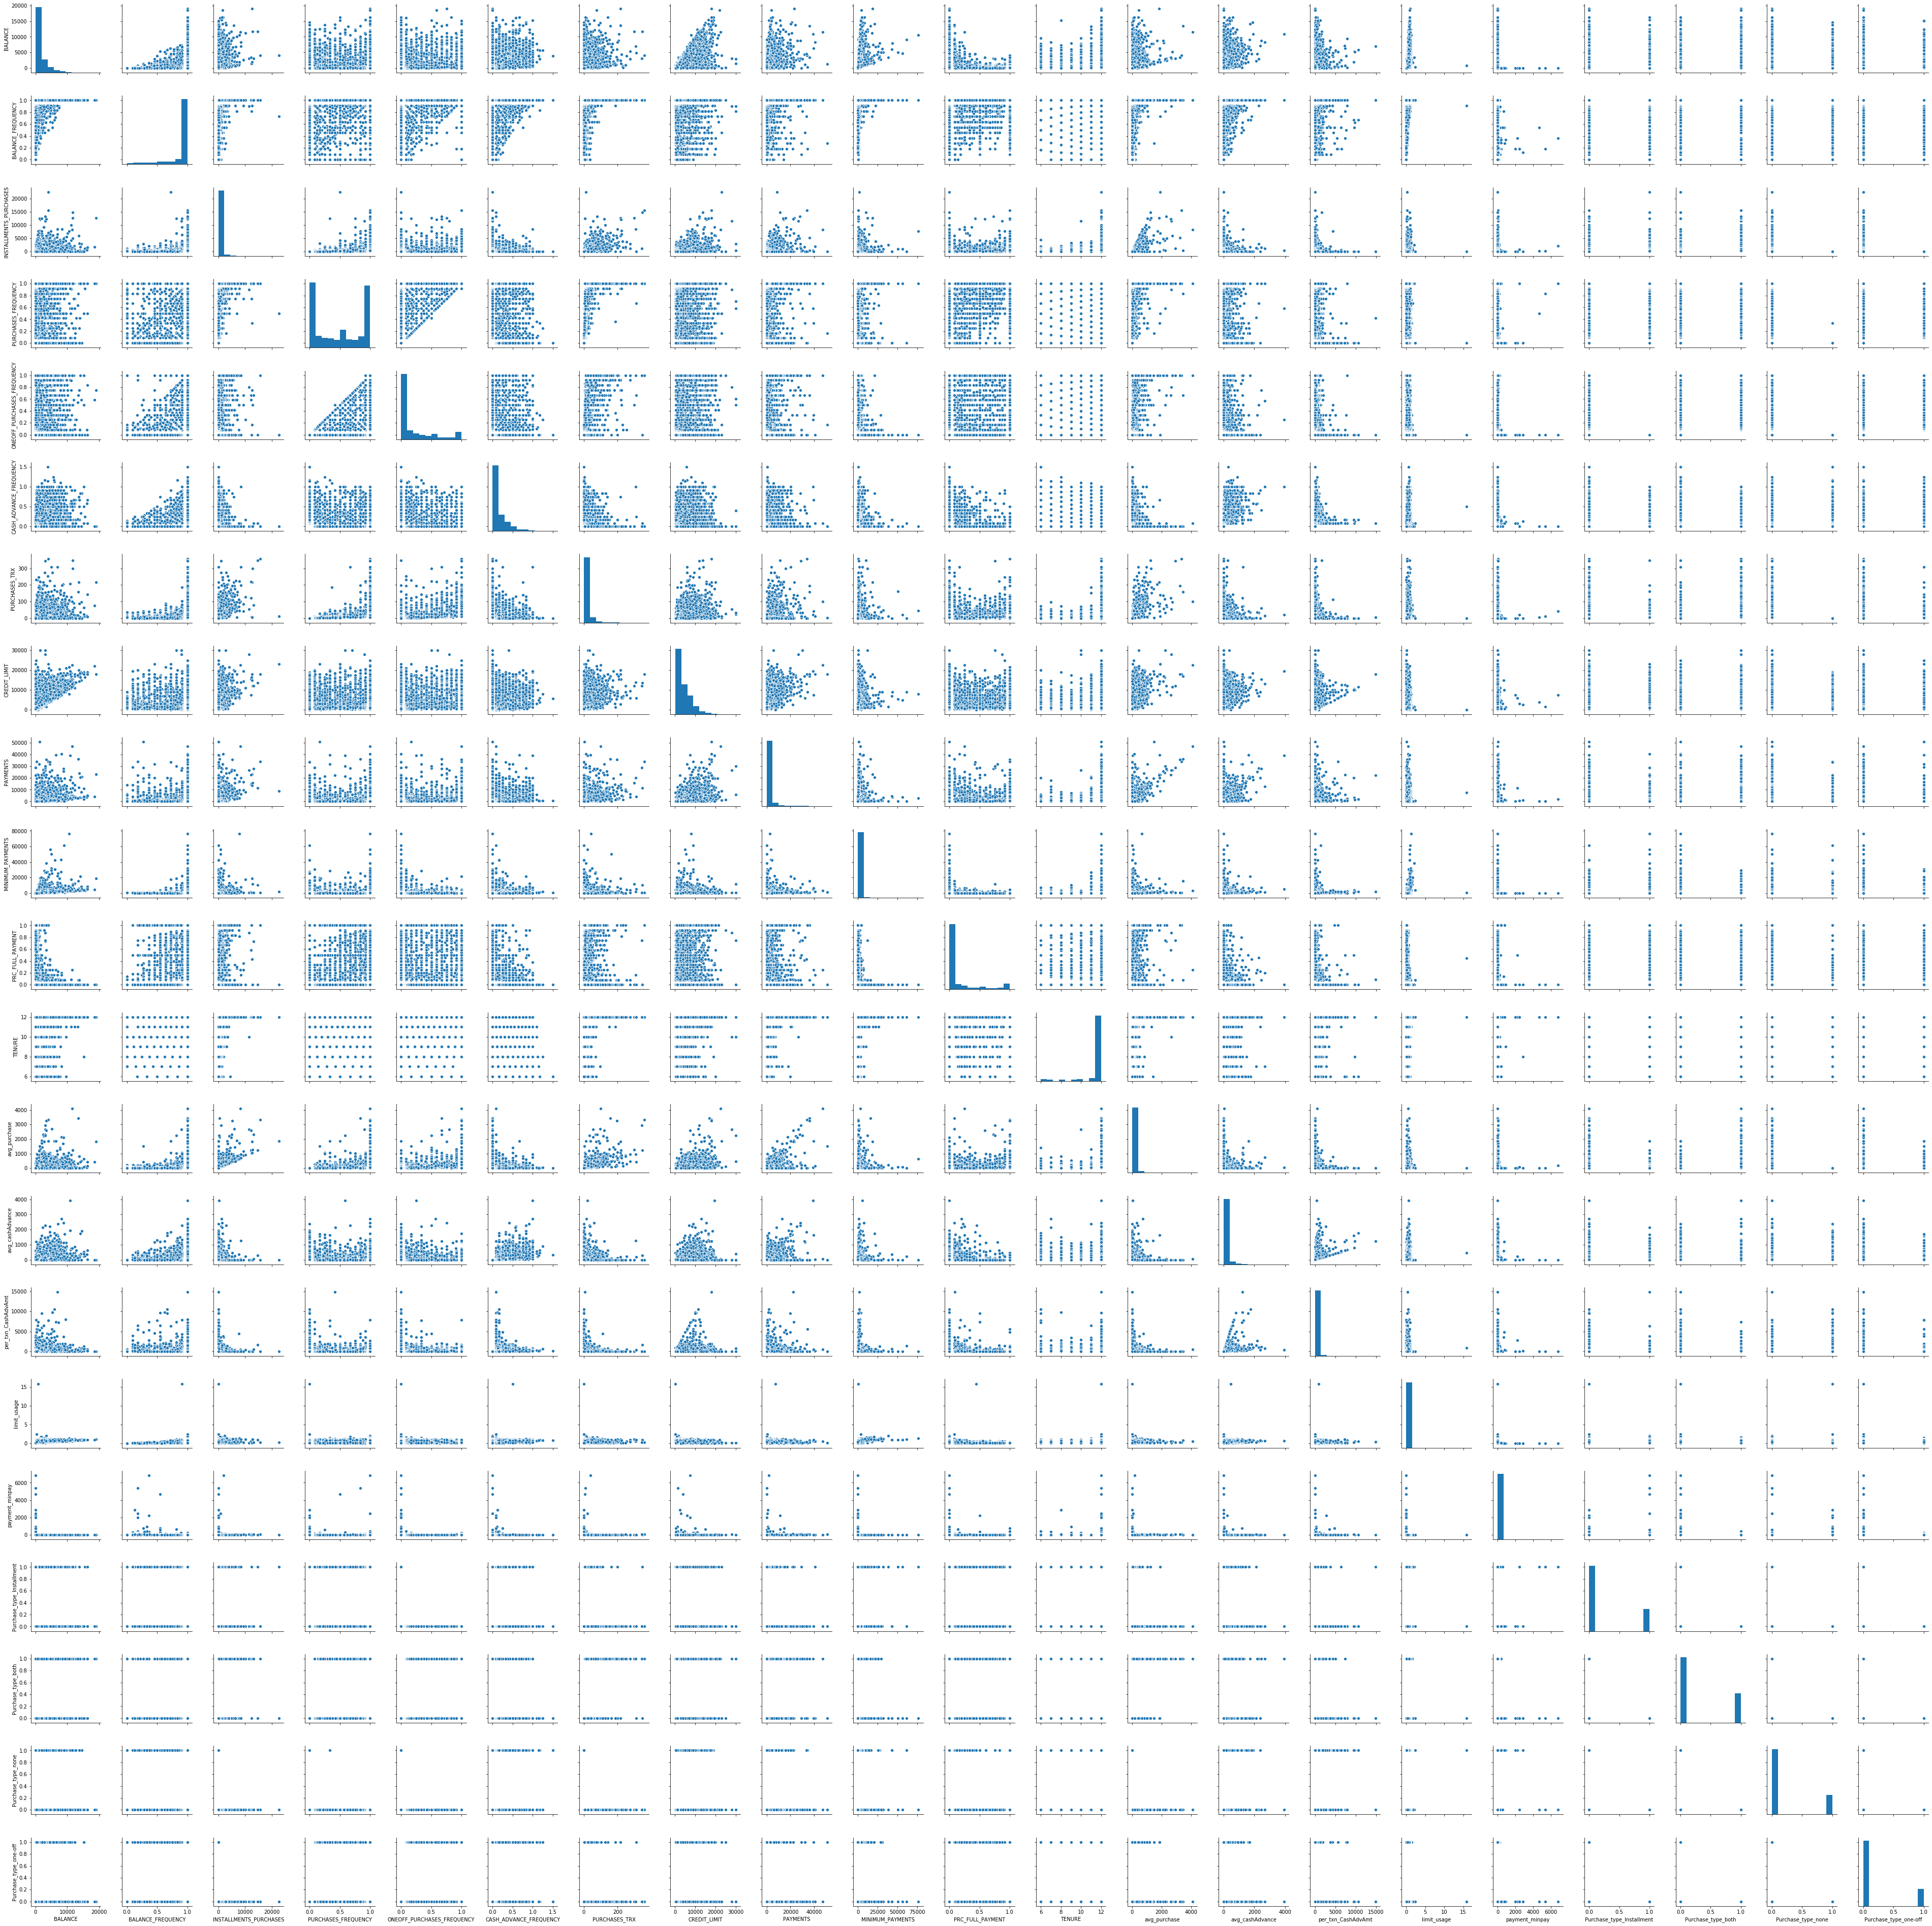

In [979]:
sns.pairplot(card_data)

In [1079]:
card_data.head()

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,...,TENURE,avg_purchase,avg_cashAdvance,per_txn_CashAdvAmt,limit_usage,payment_minpay,Purchase_type_Installment,Purchase_type_both,Purchase_type_none,Purchase_type_one-off
0,40.900749,0.818182,95.4,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,...,12,7.950000,0.000000,0.000000,0.040901,1.446508,1,0,0,0
1,3202.467416,0.909091,0.0,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,...,12,0.000000,536.912124,1610.736371,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,0.0,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,...,12,64.430833,0.000000,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,0.0,0.083333,0.083333,0.083333,1,7500.0,0.000000,312.343947,...,12,124.916667,17.149001,205.788017,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,0.0,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,...,12,1.333333,0.000000,0.000000,0.681429,2.771075,0,0,0,1


## standardization

we are using minmax scaler method to scale our datset to the same range of 0,1.

In [1080]:
scaler = MinMaxScaler(feature_range=(0,1))

In [1081]:
scaler.fit(card_data.iloc[:,:])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [1082]:
card_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'avg_purchase',
       'avg_cashAdvance', 'per_txn_CashAdvAmt', 'limit_usage',
       'payment_minpay', 'Purchase_type_Installment', 'Purchase_type_both',
       'Purchase_type_none', 'Purchase_type_one-off'],
      dtype='object')

In [1083]:
card_data2=scaler.transform(card_data)

In [1084]:
card_data2

array([[2.14779454e-03, 8.18182000e-01, 4.24000000e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 6.41777778e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [1085]:
card_data_scl=pd.DataFrame(data=card_data2,columns=['BALANCE', 'BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'avg_purchase',
       'avg_cashAdvance', 'per_txn_CashAdvAmt', 'limit_usage',
       'payment_minpay', 'Purchase_type_Installment', 'Purchase_type_both',
       'Purchase_type_none', 'Purchase_type_one-off'])

In [1086]:
card_data.head()

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,...,TENURE,avg_purchase,avg_cashAdvance,per_txn_CashAdvAmt,limit_usage,payment_minpay,Purchase_type_Installment,Purchase_type_both,Purchase_type_none,Purchase_type_one-off
0,40.900749,0.818182,95.4,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,...,12,7.950000,0.000000,0.000000,0.040901,1.446508,1,0,0,0
1,3202.467416,0.909091,0.0,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,...,12,0.000000,536.912124,1610.736371,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,0.0,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,...,12,64.430833,0.000000,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,0.0,0.083333,0.083333,0.083333,1,7500.0,0.000000,312.343947,...,12,124.916667,17.149001,205.788017,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,0.0,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,...,12,1.333333,0.000000,0.000000,0.681429,2.771075,0,0,0,1


In [1087]:
card_data_scl.head()

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,...,TENURE,avg_purchase,avg_cashAdvance,per_txn_CashAdvAmt,limit_usage,payment_minpay,Purchase_type_Installment,Purchase_type_both,Purchase_type_none,Purchase_type_one-off
0,0.002148,0.818182,0.00424,0.166667,0.000000,0.000000,0.005587,0.031720,0.003979,0.001826,...,1.0,0.001945,0.000000,0.000000,0.002571,0.000211,1.0,0.0,0.0,0.0
1,0.168169,0.909091,0.00000,0.000000,0.000000,0.166667,0.000000,0.232053,0.080893,0.014034,...,1.0,0.000000,0.136685,0.108566,0.028755,0.000559,0.0,0.0,1.0,0.0
2,0.131026,1.000000,0.00000,1.000000,1.000000,0.000000,0.033520,0.248748,0.012264,0.008210,...,1.0,0.015766,0.000000,0.000000,0.020911,0.000145,0.0,0.0,0.0,1.0
3,0.087521,0.636364,0.00000,0.083333,0.083333,0.055555,0.002793,0.248748,0.000000,0.004088,...,1.0,0.030567,0.004366,0.013870,0.013968,0.000000,0.0,0.0,0.0,1.0
4,0.042940,1.000000,0.00000,0.083333,0.083333,0.000000,0.002793,0.038397,0.013374,0.003204,...,1.0,0.000326,0.000000,0.000000,0.042830,0.000405,0.0,0.0,0.0,1.0


## Dimentionality Reduction 
### PCA Analysis

In our dataset 21 features are there so for building our model simpler i am using Principal commponent analysis technique to reduced the dimentionality of dataset.

In [1088]:
var_ratio={}
for n in range(2,22):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(card_data_scl)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [1089]:
var_ratio

{2: 0.5721879435772579,
 3: 0.7535744531887077,
 4: 0.819560569468433,
 5: 0.8747625887752355,
 6: 0.9149660521581312,
 7: 0.9455539741165441,
 8: 0.9644025860488334,
 9: 0.97913986942282,
 10: 0.9879897231435959,
 11: 0.9916592033645826,
 12: 0.994748161040586,
 13: 0.996574500851117,
 14: 0.9976182413642697,
 15: 0.9982393642725705,
 16: 0.9988263983189288,
 17: 0.9992766089444156,
 18: 0.9995644790917013,
 19: 0.999800019320302,
 20: 1.0000000000000002,
 21: 1.0000000000000002}

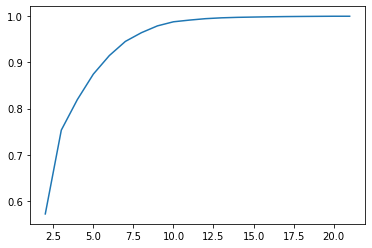

In [1090]:
pd.Series(var_ratio).plot()

In [1091]:
pca = PCA(n_components=7)
x_pca = pca.fit_transform(card_data_scl)
red_data = pd.DataFrame(x_pca)
red_data.head()

,0,1,2,3,4,5,6
0,-0.291495,0.773465,-0.077311,-0.286214,0.198084,-0.137082,0.002299
1,-0.848889,-0.325127,-0.448356,0.223349,-0.130413,-0.133204,-0.008215
2,0.346072,-0.236779,0.994869,0.032095,-0.637045,0.098535,0.445165
3,-0.457066,-0.202057,0.860904,-0.114812,0.280264,-0.127987,-0.004796
4,-0.434460,-0.214627,0.841640,-0.178714,0.062098,-0.149316,-0.240026


In [1092]:
x_pca

array([[-0.29149518,  0.7734647 , -0.07731119, ...,  0.19808409,
        -0.13708236,  0.00229897],
       [-0.84888935, -0.32512739, -0.44835646, ..., -0.1304126 ,
        -0.13320421, -0.00821484],
       [ 0.34607214, -0.23677897,  0.99486904, ..., -0.63704537,
         0.09853471,  0.44516456],
       ...,
       [ 0.06362167,  0.97281602, -0.08200432, ...,  0.04259971,
         0.88757835, -0.16714789],
       [-0.8952313 , -0.26900413, -0.43344994, ...,  0.07264164,
         0.82065974, -0.1845828 ],
       [-0.02103223, -0.18959988,  0.95276934, ..., -0.06479275,
         1.01430821,  0.1621269 ]])

In [1093]:
red_data.shape

(8950, 7)

## KMEANS Clustering

I am using Kmeans clusterring for clustering credit card data because our dataset doesn't have target value and it is under unsupervised learning algorithm.

For selecting optimal value of k i am using elbow method to check what value of k will be optimal for our dataset.

In [1094]:
cluster_range = range(2, 20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( red_data )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [1095]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[:]

,num_clusters,cluster_errors
0,2,7343.265013
1,3,4670.560386
2,4,2496.132526
3,5,2222.129459
4,6,1955.282409
5,7,1716.314112
6,8,1529.691967
7,9,1383.668199
8,10,1257.623322
9,11,1198.504132


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

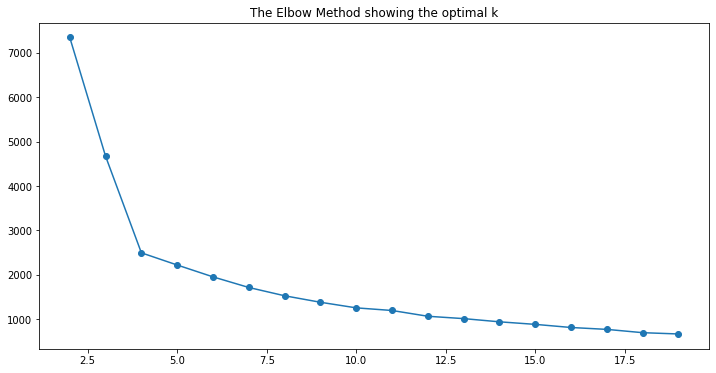

In [1096]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

plt.title('The Elbow Method showing the optimal k')

**From the elbow method and score of each cluster 2 to 19 we can see that k=4 i.e 4 clusters are optimal cluster.**


In [1097]:
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(red_data)
    scores.append(metrics.silhouette_score(red_data, km.labels_))

In [1098]:
scores

[0.3464072122613209,
 0.48447087917017895,
 0.6136709016520041,
 0.5354431943544257,
 0.5462907935653871,
 0.48136393359769764,
 0.48933177359879,
 0.49543262794281917,
 0.4746737730861044,
 0.4677892649584754,
 0.45575313123581457,
 0.4819060958963777,
 0.472352471501608,
 0.48620950042120237,
 0.47753225777670566,
 0.490236349600471,
 0.4865041529943586,
 0.491137108229741]

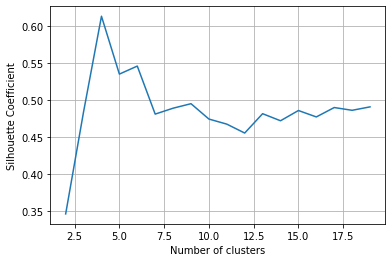

In [1099]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

From silhouette_score method we can also check for k=4 accuracy will is 61% which is the highest score among 20 number of clusters.
So, we select k value to 4 i.e 4 number of cluster is the optimal value.


In [1100]:
kmeans =KMeans(n_clusters=4).fit(red_data)

In [1101]:
red_data.head()

,0,1,2,3,4,5,6
0,-0.291495,0.773465,-0.077311,-0.286214,0.198084,-0.137082,0.002299
1,-0.848889,-0.325127,-0.448356,0.223349,-0.130413,-0.133204,-0.008215
2,0.346072,-0.236779,0.994869,0.032095,-0.637045,0.098535,0.445165
3,-0.457066,-0.202057,0.860904,-0.114812,0.280264,-0.127987,-0.004796
4,-0.434460,-0.214627,0.841640,-0.178714,0.062098,-0.149316,-0.240026


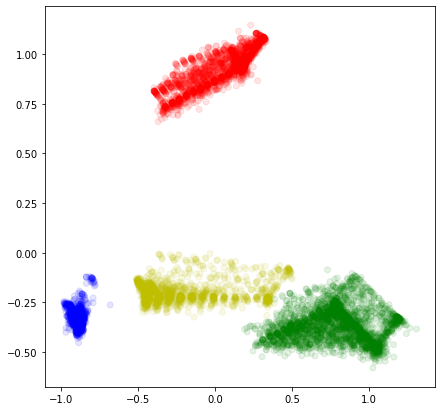

In [1102]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in kmeans.labels_]
plt.figure(figsize=(7,7))
plt.scatter(red_data.iloc[:,0],red_data.iloc[:,1],c=label_color,cmap='Spectral',alpha=0.1)

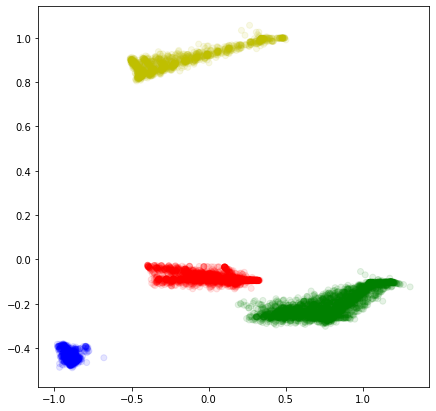

In [1103]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in kmeans.labels_]
plt.figure(figsize=(7,7))
plt.scatter(red_data.iloc[:,0],red_data.iloc[:,2],c=label_color,cmap='Spectral',alpha=0.1)

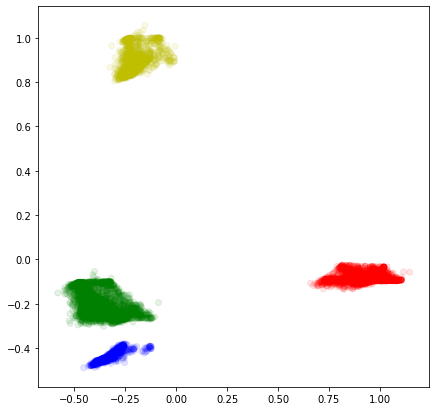

In [1104]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in kmeans.labels_]
plt.figure(figsize=(7,7))
plt.scatter(red_data.iloc[:,1],red_data.iloc[:,2],c=label_color,cmap='Spectral',alpha=0.1)

Here we can see that Principal component 1,2 and 3 are able to identify 4 clusters better then rest of the components.

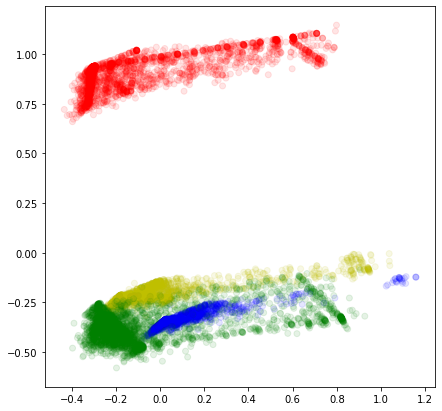

In [1105]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in kmeans.labels_]
plt.figure(figsize=(7,7))
plt.scatter(red_data.iloc[:,3],red_data.iloc[:,1],c=label_color,cmap='Spectral',alpha=0.1)

Here we can see by ploting pricipal component 4 and 5 and clusters are overlaping to each other they are not able to distinguished each cluster correctly.

In [1106]:
df_pair_plot=pd.DataFrame(x_pca,columns=['PC_' +str(i) for i in range(7)])

In [1107]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,-0.291495,0.773465,-0.077311,-0.286214,0.198084,-0.137082,0.002299
1,-0.848889,-0.325127,-0.448356,0.223349,-0.130413,-0.133204,-0.008215
2,0.346072,-0.236779,0.994869,0.032095,-0.637045,0.098535,0.445165
3,-0.457066,-0.202057,0.860904,-0.114812,0.280264,-0.127987,-0.004796
4,-0.434460,-0.214627,0.841640,-0.178714,0.062098,-0.149316,-0.240026


In [1108]:
df_pair_plot['Cluster']=kmeans.labels_ #Add cluster column in the data frame

In [1109]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,Cluster
0,-0.291495,0.773465,-0.077311,-0.286214,0.198084,-0.137082,0.002299,0
1,-0.848889,-0.325127,-0.448356,0.223349,-0.130413,-0.133204,-0.008215,1
2,0.346072,-0.236779,0.994869,0.032095,-0.637045,0.098535,0.445165,3
3,-0.457066,-0.202057,0.860904,-0.114812,0.280264,-0.127987,-0.004796,3
4,-0.434460,-0.214627,0.841640,-0.178714,0.062098,-0.149316,-0.240026,3


C:\Users\pooja\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


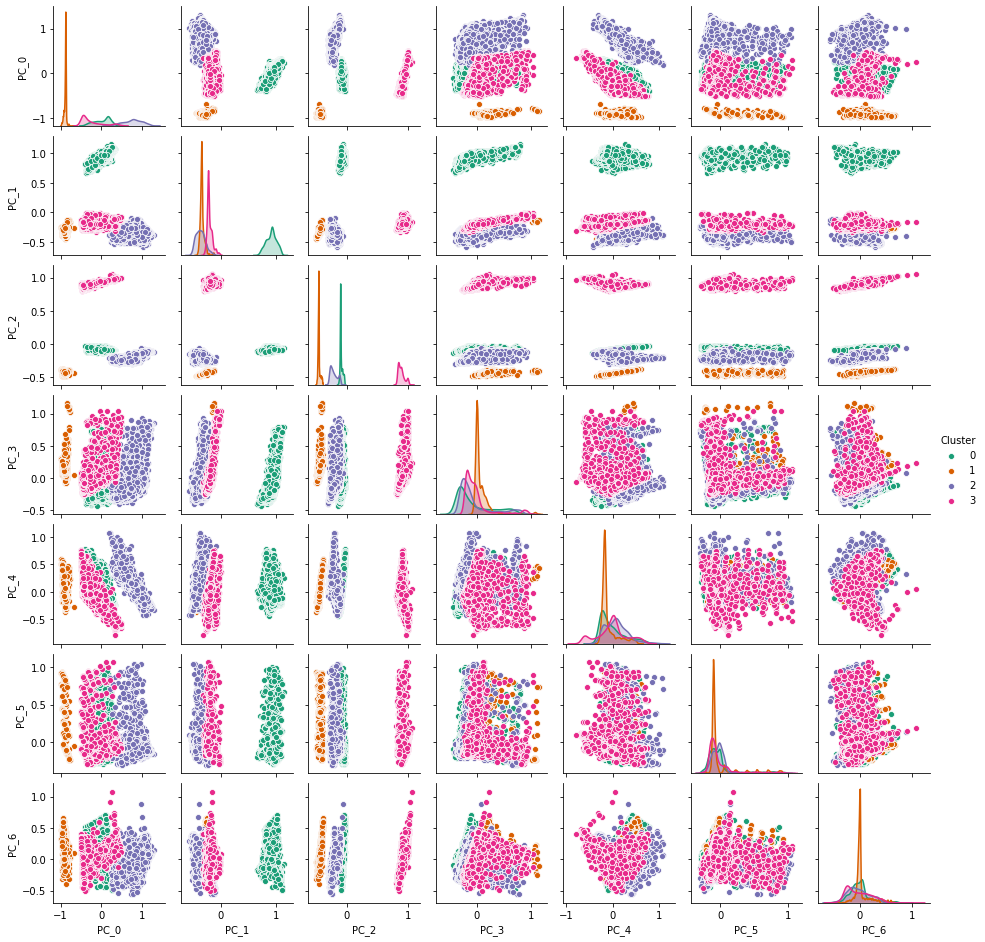

In [1110]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster',palette= 'Dark2', diag_kind='kde',size=1.85)

**From the above plot we can see that principal component 1, 2 and 3 are sufficient to identify clusters.**



In [1111]:
# Conactenating labels found through Kmeans with data 
cluster4_card_data=pd.concat([card_data,pd.Series(kmeans.labels_,name='Cluster')],axis=1)

In [1112]:
cluster4_card_data.head()

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,...,avg_purchase,avg_cashAdvance,per_txn_CashAdvAmt,limit_usage,payment_minpay,Purchase_type_Installment,Purchase_type_both,Purchase_type_none,Purchase_type_one-off,Cluster
0,40.900749,0.818182,95.4,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,...,7.950000,0.000000,0.000000,0.040901,1.446508,1,0,0,0,0
1,3202.467416,0.909091,0.0,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,...,0.000000,536.912124,1610.736371,0.457495,3.826241,0,0,1,0,1
2,2495.148862,1.000000,0.0,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,...,64.430833,0.000000,0.000000,0.332687,0.991682,0,0,0,1,3
3,1666.670542,0.636364,0.0,0.083333,0.083333,0.083333,1,7500.0,0.000000,312.343947,...,124.916667,17.149001,205.788017,0.222223,0.000000,0,0,0,1,3
4,817.714335,1.000000,0.0,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,...,1.333333,0.000000,0.000000,0.681429,2.771075,0,0,0,1,3


In [1113]:
cluster4_card_data.groupby('Cluster').count()

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,...,TENURE,avg_purchase,avg_cashAdvance,per_txn_CashAdvAmt,limit_usage,payment_minpay,Purchase_type_Installment,Purchase_type_both,Purchase_type_none,Purchase_type_one-off
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260,...,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260
1,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,...,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042
2,2774,2774,2774,2774,2774,2774,2774,2774,2774,2774,...,2774,2774,2774,2774,2774,2774,2774,2774,2774,2774
3,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,...,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874


In [1114]:
cluster4_card_data.query('Cluster==0').describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,2260.0,845.278262,1685.185572,0.000000,24.618597,100.423164,1007.381733,16304.889250
BALANCE_FREQUENCY,2260.0,0.822451,0.281877,0.000000,0.727273,1.000000,1.000000,1.000000
INSTALLMENTS_PURCHASES,2260.0,537.878469,880.855406,4.440000,155.800000,327.585000,610.680000,22500.000000
PURCHASES_FREQUENCY,2260.0,0.694690,0.309117,0.000000,0.416667,0.777778,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,2260.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,2260.0,0.053507,0.138308,0.000000,0.000000,0.000000,0.000000,1.000000
PURCHASES_TRX,2260.0,11.911504,13.985737,0.000000,6.000000,10.000000,12.000000,347.000000
CREDIT_LIMIT,2260.0,3371.864329,2962.540364,300.000000,1500.000000,2500.000000,4000.000000,23000.000000
PAYMENTS,2260.0,994.197964,1889.062766,0.000000,238.982901,507.302807,1092.545791,40627.595240
MINIMUM_PAYMENTS,2260.0,845.471002,3127.330195,0.019163,132.653414,178.475912,504.145750,76406.207520


In [1115]:
cluster4_card_data.query('Cluster==1').describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,2042.0,2147.759969,2113.117162,0.000000,742.233698,1454.882732,2841.823890,14581.459140
BALANCE_FREQUENCY,2042.0,0.882385,0.232558,0.000000,0.900000,1.000000,1.000000,1.000000
INSTALLMENTS_PURCHASES,2042.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PURCHASES_FREQUENCY,2042.0,0.000163,0.007377,0.000000,0.000000,0.000000,0.000000,0.333333
ONEOFF_PURCHASES_FREQUENCY,2042.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,2042.0,0.272694,0.201230,0.000000,0.090909,0.250000,0.333333,1.500000
PURCHASES_TRX,2042.0,0.001469,0.049473,0.000000,0.000000,0.000000,0.000000,2.000000
CREDIT_LIMIT,2042.0,4025.987594,3259.753167,50.000000,1500.000000,3000.000000,6000.000000,19000.000000
PAYMENTS,2042.0,1653.687908,2717.506415,0.000000,359.225304,762.840240,1723.615091,34107.074990
MINIMUM_PAYMENTS,2042.0,978.351895,2570.558784,0.117036,270.328859,469.882238,975.572223,61031.618600


In [1116]:
cluster4_card_data.query('Cluster==2').describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,2774.0,1805.968182,2279.128462,0.000000,283.129513,975.944218,2422.219908,19043.138560
BALANCE_FREQUENCY,2774.0,0.945825,0.143054,0.000000,1.000000,1.000000,1.000000,1.000000
INSTALLMENTS_PURCHASES,2774.0,888.049776,1236.071602,1.950000,213.465000,497.405000,1106.835000,15497.190000
PURCHASES_FREQUENCY,2774.0,0.799116,0.242602,0.083333,0.666667,0.916667,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,2774.0,0.436502,0.319255,0.083333,0.166667,0.333333,0.666667,1.000000
CASH_ADVANCE_FREQUENCY,2774.0,0.106810,0.190763,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_TRX,2774.0,32.959625,34.205840,2.000000,12.000000,23.000000,41.000000,358.000000
CREDIT_LIMIT,2774.0,5738.829463,4053.753173,300.000000,2500.000000,5000.000000,7500.000000,30000.000000
PAYMENTS,2774.0,2545.447418,3592.163484,0.000000,739.862406,1477.254345,2893.023315,46930.598240
MINIMUM_PAYMENTS,2774.0,838.499589,1697.995297,13.545097,182.644913,328.772841,888.225745,29019.802880


In [1117]:
cluster4_card_data.query('Cluster==3').describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1874.0,1438.761601,1903.425919,0.000000,122.283334,817.576994,1873.045001,15258.225900
BALANCE_FREQUENCY,1874.0,0.836331,0.266080,0.000000,0.727273,1.000000,1.000000,1.000000
INSTALLMENTS_PURCHASES,1874.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PURCHASES_FREQUENCY,1874.0,0.321001,0.291602,0.083333,0.083333,0.166667,0.428571,1.000000
ONEOFF_PURCHASES_FREQUENCY,1874.0,0.320779,0.291675,0.083333,0.083333,0.166667,0.428571,1.000000
CASH_ADVANCE_FREQUENCY,1874.0,0.125657,0.200814,0.000000,0.000000,0.000000,0.166667,1.250000
PURCHASES_TRX,1874.0,7.110459,13.693388,1.000000,1.000000,3.000000,9.000000,309.000000
CREDIT_LIMIT,1874.0,4515.920572,3565.228611,150.000000,1800.000000,3000.000000,6500.000000,25000.000000
PAYMENTS,1874.0,1508.456900,2626.158334,0.000000,344.974960,730.377642,1647.885020,50721.483360
MINIMUM_PAYMENTS,1874.0,708.302384,1642.548848,0.055880,167.749630,312.343947,690.411755,30528.432400


# Summary

We have done data analysis of credit card dataset. We derived certain insights form the dataset those are:

* cluster 4 customer are those who highest agerage purchase transaction and  have both type of payment and have maximum credit score.
* Cluster 3 customer are those customer who have done only one-off payment.
* Cluster 2 customer have lowest creadit limit range from 50 to 19000 and have not done purchase anything yet.
* Cluster 1 customer have maximum installment purchse and least payment ratio and credit_score.
